In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("../../data/telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному 
## 1.1. Количественные
Гистограмма и боксплот

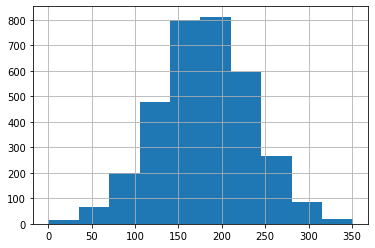

In [4]:
df["Total day minutes"].hist();

C:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


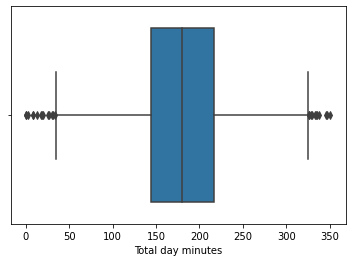

In [5]:
sns.boxplot(df["Total day minutes"]);

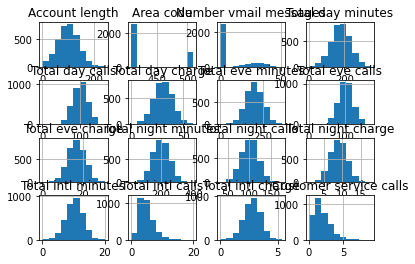

In [6]:
df.hist();

# 1.2. Категориальные
countplot

In [7]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [8]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

C:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


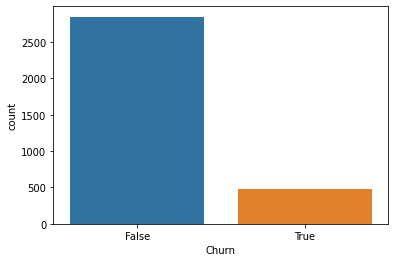

In [9]:
sns.countplot(df["Churn"]);

C:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


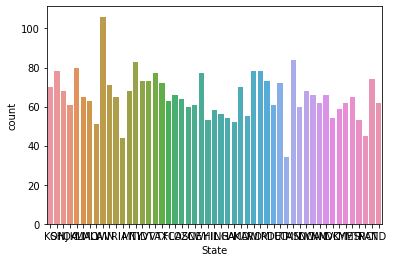

In [10]:
sns.countplot(df["State"]);

C:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


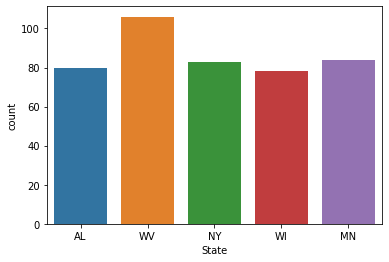

In [11]:
sns.countplot(df[df["State"].isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействия признаков
## 2.1. Количественный с количественным
pairplot, scatterplot, корреляции, heatmap

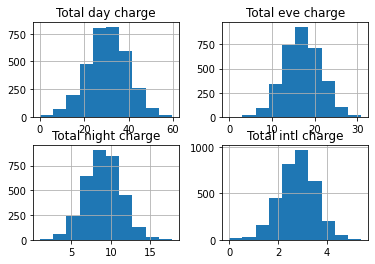

In [12]:
feat = [f for f in df.columns if "charge" in f]

df[feat].hist();

In [ ]:
sns.pairplot(df[feat]);

In [14]:
df["Churn"] = df["Churn"].map({0: False, 1: True})
df["Churn"].map({False: "blue", True: "orange"}).head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Churn, dtype: object

In [47]:
df[~df["Churn"]].head()

TypeError: bad operand type for unary ~: 'float'

In [48]:
plt.scatter(
    df[df["Churn"]]["Total eve charge"],
    df[df["Churn"]]["Total intl charge"],
    color="orange",
    label="churn",
)
plt.scatter(
    df[~df["Churn"]]["Total eve charge"],
    df[~df["Churn"]]["Total intl charge"],
    color="blue",
    label="loyal",
)
plt.xlabel("Вечерние начисления")
plt.ylabel("Межнар. начисления")
plt.title("Распределение начислений для лояльных/ушедших")
plt.legend();

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=3333)] are in the [columns]"

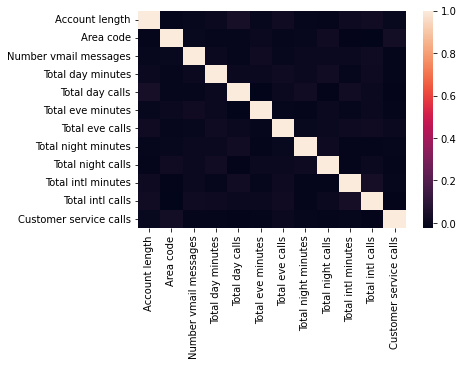

In [49]:
sns.heatmap(df.corr());

In [50]:
df.drop(feat, axis=1, inplace=True)

KeyError: "['Total day charge' 'Total eve charge' 'Total night charge'\n 'Total intl charge'] not found in axis"

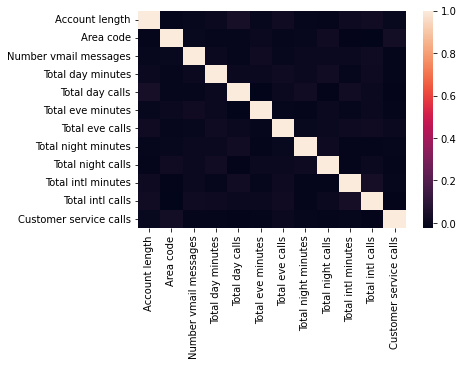

In [51]:
sns.heatmap(df.corr());

## 2.2.  Количественный с категориальным
boxplot, violinplot

In [52]:
sns.boxplot(x="Churn", y="Total day minutes", data=df);

ValueError: min() arg is an empty sequence

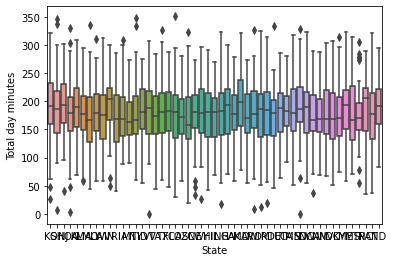

In [53]:
sns.boxplot(x="State", y="Total day minutes", data=df);

In [54]:
sns.violinplot(x="Churn", y="Total day minutes", data=df);

ValueError: min() arg is an empty sequence

In [ ]:
df.groupby("International plan")["Total day minutes"].mean()

In [ ]:
sns.boxplot(x="International plan", y="Total day minutes", data=df);

## 2.3. Категориальный с категориальным
countplot

In [ ]:
pd.crosstab(df["Churn"], df["International plan"])

In [ ]:
sns.countplot(x="International plan", hue="Churn", data=df);

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

## 3. Прочее
Manifold learning, один из представителей – t-SNE

In [55]:
from sklearn.manifold import TSNE

In [56]:
tsne = TSNE(random_state=0)

In [57]:
df2 = df.drop(["State", "Churn"], axis=1)

In [58]:
df2["International plan"] = df2["International plan"].map({"Yes": 1, "No": 0})
df2["Voice mail plan"] = df2["Voice mail plan"].map({"Yes": 1, "No": 0})

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 3

In [60]:
%%time
tsne.fit(df2)

Wall time: 30 s


TSNE(random_state=0)

In [61]:
plt.scatter(
    tsne.embedding_[df["Churn"].values, 0],
    tsne.embedding_[df["Churn"].values, 1],
    color="orange",
    alpha=0.7,
)
plt.scatter(
    tsne.embedding_[~df["Churn"].values, 0],
    tsne.embedding_[~df["Churn"].values, 1],
    color="blue",
    alpha=0.7,
);

IndexError: arrays used as indices must be of integer (or boolean) type